In [14]:
import xarray as xr
import matplotlib.pyplot as plt
import IscaRegimes
import pandas as pd
import numpy as np
import cartopy.crs as ccrs; import cartopy.feature as cfeature

In [2]:
# open momentum budget
ds = xr.open_dataset('./era5_200hPa_momentum_budget_august.nc')

In [3]:
cls = IscaRegimes.IscaRegimes(ds_budget=ds,nc=10,nens=5,backend='mpi')

[INFO] MPI is NOT available. Using 'sciris' instead


In [4]:
%%time
# creates momentum budget dataframe
cls.make_features()

CPU times: user 4.38 ms, sys: 43 μs, total: 4.42 ms
Wall time: 4.26 ms


In [5]:
# cls.feature

In [6]:
%%time
# returns nemi pack
res = cls.get_nemi_pack()

/home/users/duttaay/.conda/envs/jupyter-env1/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/users/duttaay/.conda/envs/jupyter-env1/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/users/duttaay/.conda/envs/jupyter-env1/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/users/duttaay/.conda/envs/jupyter-env1/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/users/duttaay/.conda/envs/jupyter-env1/lib/python3.13/site-packages/sklearn/ut

realisation finished
realisation finished•••———————————————————————— 20%
realisation finished•••••••••—————————————————— 40%
realisation finished•••••••••••••••———————————— 60%
realisation finished•••••••••••••••••••••—————— 80%
Job 5/5 (30.7 s) •••••••••••••••••••••••••••••• 100%
CPU times: user 37.1 ms, sys: 67.4 ms, total: 104 ms
Wall time: 30.8 s


In [7]:
%%time
# returns entropy
ent = cls.get_entropy()

Job 5/5 (0.3 s) •••••••••••••••••••••••••••••• 100%
[INFO] base_id with least average entropy 1
[INFO] Minimum entropy in % 14.98
CPU times: user 253 ms, sys: 64.4 ms, total: 317 ms
Wall time: 606 ms


In [8]:
%%time
# returns NEMI cluster - dynamical regimes as numpy array
pl = cls.export_nemi_clusters()

base_id that returns least average entropy 1
CPU times: user 6 ms, sys: 3.74 ms, total: 9.74 ms
Wall time: 8.89 ms


In [9]:
# plt.hist(ent)

In [10]:
%%time
# returns budget terms evaluated for dynamical regimes and corresponding dominant balance of terms
bal = cls.kaiser_dom_balance(ent)

base_id that returns least average entropy 1
CPU times: user 77.2 ms, sys: 1.79 ms, total: 79 ms
Wall time: 80.6 ms


<Axes: >

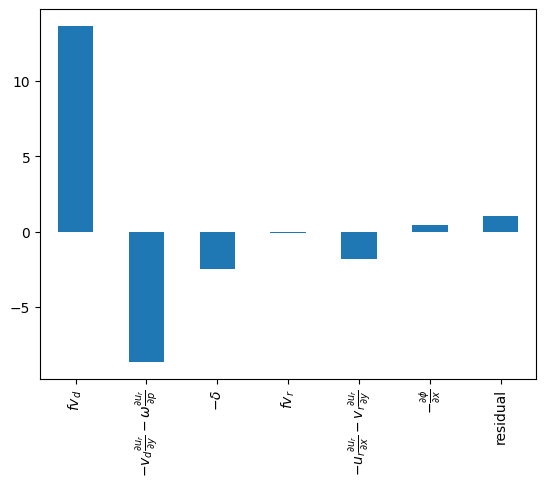

In [21]:
# Plot bar charts
bal[0].iloc[8,:].plot.bar()

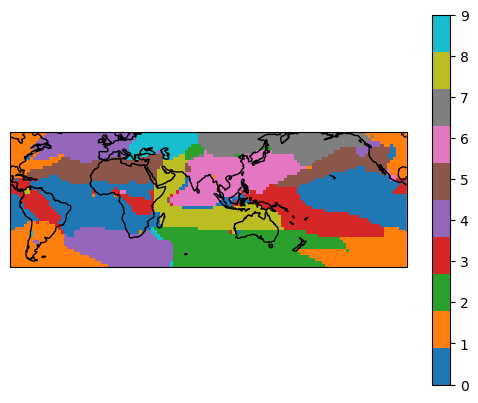

In [19]:
# plot dynamical regimes
fig,ax = plt.subplots(1,subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=90)))
pl.plot(ax=ax,transform=ccrs.PlateCarree(),cmap=plt.cm.tab10)
ax.coastlines()
